Fear & Greed Index:
          Date Sentiment
0  2023-01-01     Greed
1  2023-01-02     Greed
2  2023-01-03     Greed
3  2023-01-04     Greed
4  2023-01-05      Fear

Trader Data:
   account  symbol  execution price      size  side                 time  \
0    acc2  ETHUSD          1353.97  0.607343   Buy  2023-01-27 19:45:00   
1    acc2  ETHUSD         22118.17  0.463142  Sell  2023-01-11 17:44:00   
2    acc3  BTCUSD          1087.95  1.181531  Sell  2023-01-10 01:17:00   
3    acc2  BTCUSD         30538.57  0.540334   Buy  2023-01-20 21:35:00   
4    acc3  BTCUSD          1734.13  0.720375   Buy  2023-01-17 17:42:00   

   start position  event   closedPnL  leverage  
0        3.092371  trade   -7.718514         5  
1        1.961276  trade -193.991628        15  
2        3.858793  trade  -92.460557         2  
3        3.897962  trade  172.862689         3  
4        0.516166  trade  215.954437        15  

Merged Dataset:
   account  symbol  execution price      size  side       

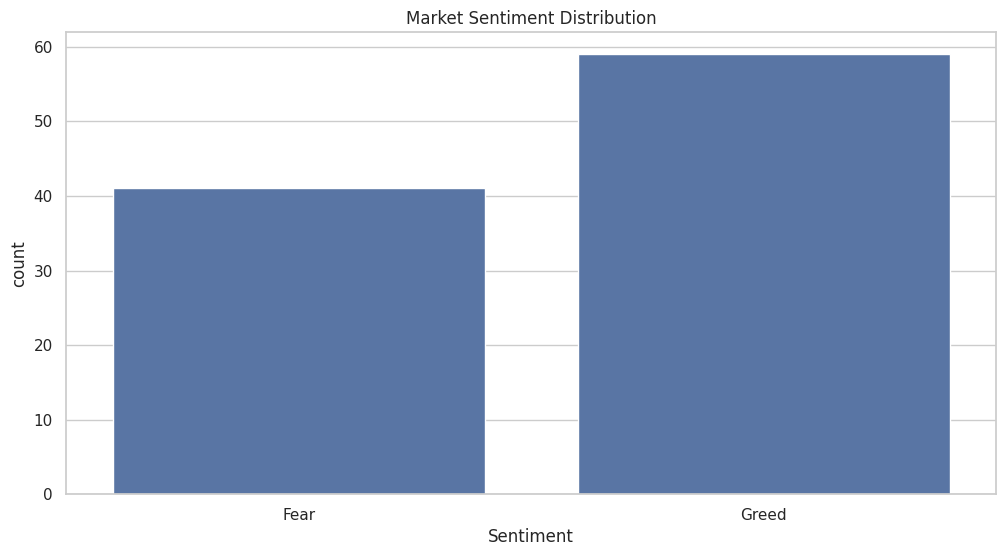

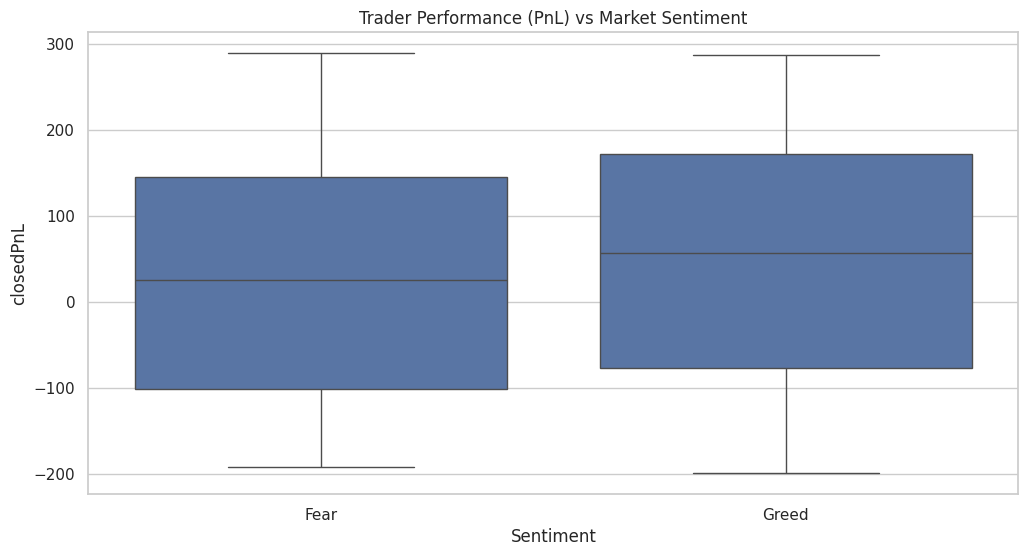

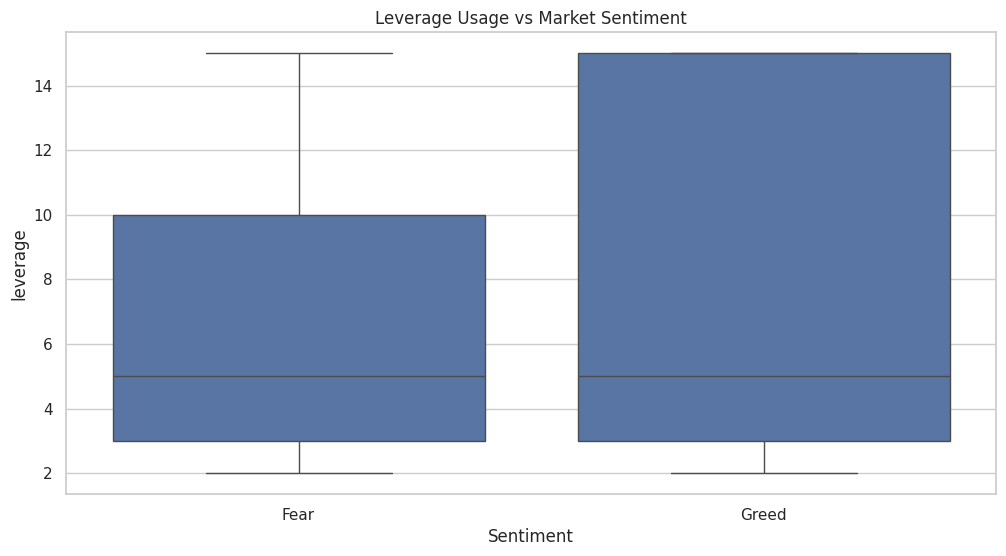

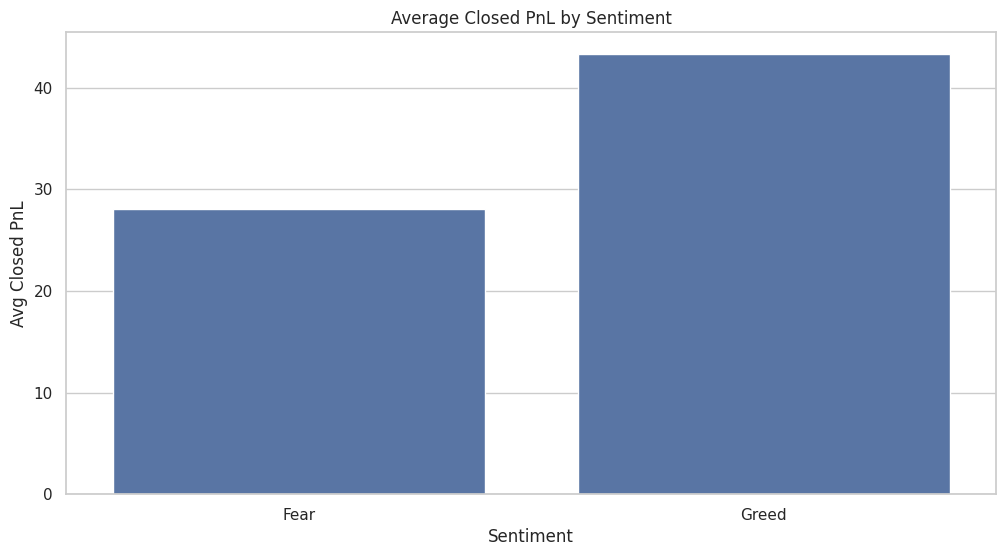

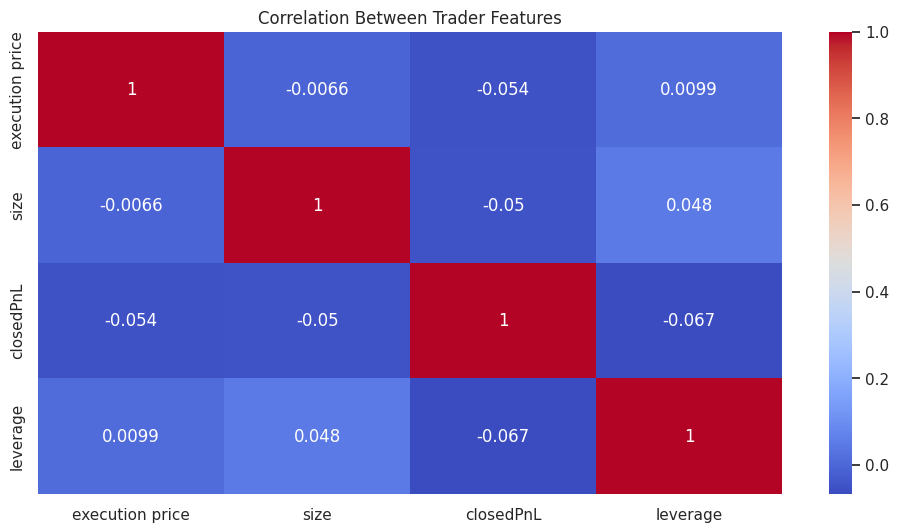


Average Trader Metrics by Sentiment:
            execution price      size  closedPnL  leverage
Sentiment                                                
Fear          15837.875122  1.036345  28.092564  6.073171
Greed         18229.093220  1.038724  43.299392  7.983051


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set default styles for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the Fear & Greed dataset
fear_greed = pd.read_csv("fear_greed.csv")

# Load the historical trader data
trader_data = pd.read_csv("historical_trades.csv")

# Display the first few rows of both datasets
print("Fear & Greed Index:\n", fear_greed.head())
print("\nTrader Data:\n", trader_data.head())

# Rename columns if necessary
fear_greed.columns = ['Date', 'Sentiment']
fear_greed['Date'] = pd.to_datetime(fear_greed['Date'])

# Convert 'time' column in trader data to datetime
trader_data['time'] = pd.to_datetime(trader_data['time'])

# Extract only the date part for merging
trader_data['Date'] = trader_data['time'].dt.date
trader_data['Date'] = pd.to_datetime(trader_data['Date'])

# Merge both datasets on the 'Date' column
merged_df = pd.merge(trader_data, fear_greed, on='Date', how='inner')

print("\nMerged Dataset:\n", merged_df.head())

# Count of records per sentiment class
sns.countplot(x='Sentiment', data=merged_df)
plt.title('Market Sentiment Distribution')
plt.show()

# Analyze closedPnL vs Sentiment
sns.boxplot(x='Sentiment', y='closedPnL', data=merged_df)
plt.title('Trader Performance (PnL) vs Market Sentiment')
plt.show()

# Analyze leverage usage across different sentiments
sns.boxplot(x='Sentiment', y='leverage', data=merged_df)
plt.title('Leverage Usage vs Market Sentiment')
plt.show()

# Average closedPnL by sentiment
avg_pnl = merged_df.groupby('Sentiment')['closedPnL'].mean().reset_index()
sns.barplot(x='Sentiment', y='closedPnL', data=avg_pnl)
plt.title('Average Closed PnL by Sentiment')
plt.ylabel('Avg Closed PnL')
plt.show()

# Correlation between numerical trading features
numeric_cols = ['execution price', 'size', 'closedPnL', 'leverage']
sns.heatmap(merged_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Trader Features")
plt.show()

# Print average numerical metrics per sentiment group
agg_metrics = merged_df.groupby('Sentiment')[numeric_cols].mean()
print("\nAverage Trader Metrics by Sentiment:\n", agg_metrics)

# Save merged dataset if needed
merged_df.to_csv("merged_sentiment_trader_data.csv", index=False)
